In [1]:
import pickle
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
model_path = Path("../models")

for fn in model_path.iterdir():
    print(fn)

..\models\.gitkeep
..\models\all_model_hm.png
..\models\lr_cm.png
..\models\lr_pipe.joblib
..\models\lr_results.json
..\models\naive_bayes_cm.png
..\models\naive_bayes_pipe.joblib
..\models\naive_bayes_results.json
..\models\nn_cm.png
..\models\nn_loss.png
..\models\nn_model.pt
..\models\nn_results.pkl
..\models\old_model_cm.png
..\models\old_model_results.json
..\models\sentiment_pipe.joblib
..\models\svm_cm.png
..\models\svm_pipe.joblib
..\models\svm_results.json


## Old model stats

In [3]:
with open('..\models\old_model_results.json','rb') as f:
    results = json.load(f)
    
print(json.dumps(results, indent=2))

{
  "Negative": {
    "precision": 0.8,
    "recall": 0.06666666666666667,
    "f1-score": 0.12307692307692308,
    "support": 120
  },
  "Positive": {
    "precision": 0.643312101910828,
    "recall": 0.9901960784313726,
    "f1-score": 0.7799227799227798,
    "support": 204
  },
  "accuracy": 0.6481481481481481,
  "macro avg": {
    "precision": 0.721656050955414,
    "recall": 0.5284313725490196,
    "f1-score": 0.45149985149985145,
    "support": 324
  },
  "weighted avg": {
    "precision": 0.7013446567586694,
    "recall": 0.6481481481481481,
    "f1-score": 0.5366465366465366,
    "support": 324
  }
}


In [4]:
X = np.zeros((7, 5))

file_dict = {
    'original': Path("../models/old_model_results.json"),
    'logreg': Path("../models/lr_results.json"),
    'nb': Path('../models/naive_bayes_results.json'),
    'svm': Path("../models/svm_results.json"),
    'ann': Path("../models/nn_results.pkl")
}

for i, (col, fn) in enumerate(file_dict.items()):
    if fn.suffix == ".json":
        with open(fn,'rb') as f:
            results = json.load(f)
    else:
        with open(fn, 'rb') as f:
            results = pickle.load(f)
            results = results["val"]["report"][-1]
    
    X[0, i] = results["accuracy"]
    X[1, i] = results["Positive"]["f1-score"]
    X[2, i] = results["Positive"]["precision"]
    X[3, i] = results["Positive"]["recall"]
    X[4, i] = results["Negative"]["f1-score"]
    X[5, i] = results["Negative"]["precision"]
    X[6, i] = results["Negative"]["recall"]

df = pd.DataFrame(index=['Accuracy', 'f1-score (pos)', 'Precision (pos)', 'Recall (pos)',
                         'f1-score (neg)', 'Precision (neg)', 'Recall (neg)'],
             columns=['Original', 'LogReg', 'Naive Bayes', 'SVM', 'Neural Network'],
            data=np.array(X))
df

,Original,LogReg,Naive Bayes,SVM,Neural Network
Accuracy,0.648148,0.854938,0.870370,0.867284,0.867284
f1-score (pos),0.779923,0.885645,0.900000,0.895377,0.892231
Precision (pos),0.643312,0.879227,0.875000,0.888889,0.912821
Recall (pos),0.990196,0.892157,0.926471,0.901961,0.872549
f1-score (neg),0.123077,0.801688,0.815789,0.818565,0.827309
Precision (neg),0.800000,0.811966,0.861111,0.829060,0.798450
Recall (neg),0.066667,0.791667,0.775000,0.808333,0.858333


In [5]:
print(df.to_markdown())

|                 |   Original |   LogReg |   Naive Bayes |      SVM |   Neural Network |
|:----------------|-----------:|---------:|--------------:|---------:|-----------------:|
| Accuracy        |  0.648148  | 0.854938 |      0.87037  | 0.867284 |         0.867284 |
| f1-score (pos)  |  0.779923  | 0.885645 |      0.9      | 0.895377 |         0.892231 |
| Precision (pos) |  0.643312  | 0.879227 |      0.875    | 0.888889 |         0.912821 |
| Recall (pos)    |  0.990196  | 0.892157 |      0.926471 | 0.901961 |         0.872549 |
| f1-score (neg)  |  0.123077  | 0.801688 |      0.815789 | 0.818565 |         0.827309 |
| Precision (neg) |  0.8       | 0.811966 |      0.861111 | 0.82906  |         0.79845  |
| Recall (neg)    |  0.0666667 | 0.791667 |      0.775    | 0.808333 |         0.858333 |


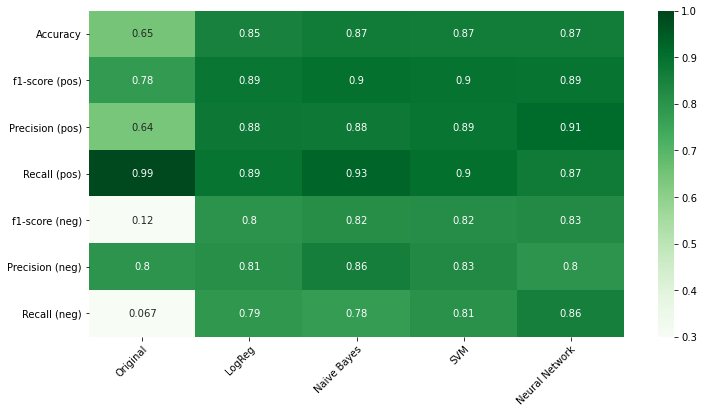

In [6]:
plt.figure(figsize=(12, 6))
g = sns.heatmap(df, annot=True, cmap="Greens", vmin=0.3, vmax=1)
plt.setp(g.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.savefig(model_path / "all_model_hm.png")
plt.show()

In [7]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

## ANN model analysis

In [8]:
with open('../models/nn_results.pkl','rb') as f:
    res_ann = pickle.load(f)
    
print(res_ann)

{'train': {'loss': [0.5610184669494629, 0.23098696768283844, 0.009153353981673717, 2.8405273155840405e-07, 4.6566125955216364e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'cm': [array([[  0,  96],
       [  0, 160]], dtype=int64), array([[ 95,   1],
       [  4, 156]], dtype=int64), array([[ 95,   1],
       [  0, 160]], dtype=int64), array([[ 96,   0],
       [  0, 160]], dtype=int64), array([[ 96,   0],
       [  0, 160]], dtype=int64), array([[ 96,   0],
       [  0, 160]], dtype=int64), array([[ 96,   0],
       [  0, 160]], dtype=int64), array([[ 96,   

In [9]:
# Plot loss
train_loss = res_ann["train"]["loss"]
val_loss = res_ann["val"]["loss"]

train_acc = [rep_ep["accuracy"] for rep_ep in res_ann["train"]["report"]]
val_acc = [rep_ep["accuracy"] for rep_ep in res_ann["val"]["report"]]

colors = ['darkblue', 'darkorange', 'royalblue', 'orange']
labels = ["train loss", "val loss", "train acc", "val acc"]

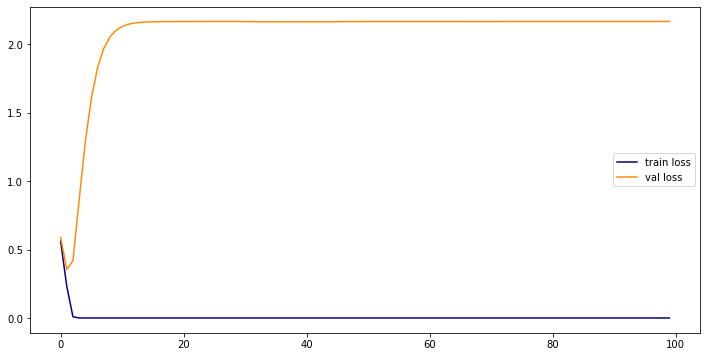

In [10]:
plt.figure(figsize=(12, 6))
for c, l, metric in zip(colors[:2], labels[:2], [train_loss, val_loss]):
    plt.plot(metric, color=c, label=l)
plt.legend()
plt.show()

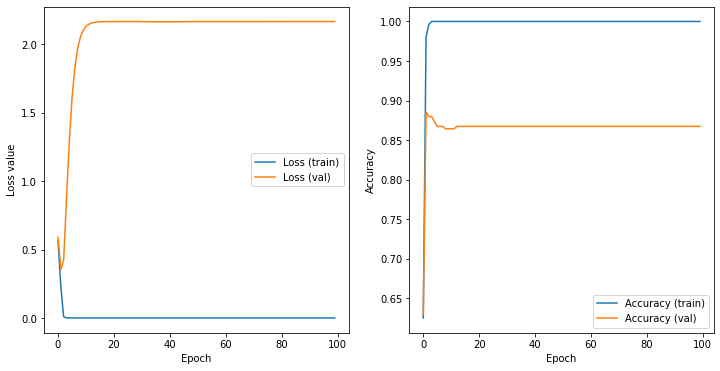

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.plot(train_loss, label="Loss (train)")
ax1.plot(val_loss, label="Loss (val)")
ax1.set_ylabel("Loss value")
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(train_acc, label="Accuracy (train)")
ax2.plot(val_acc, label="Accuracy (val)")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epoch")
ax2.legend()
plt.show()

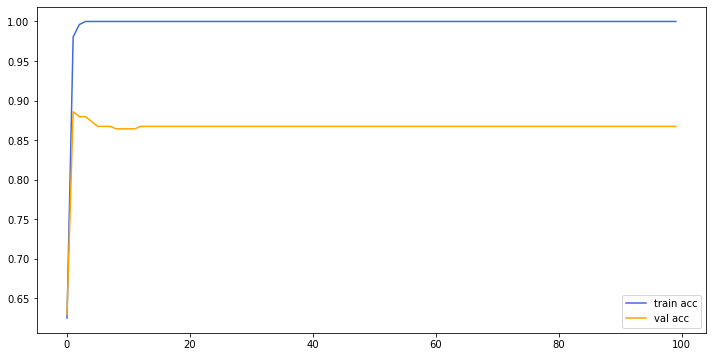

In [12]:
plt.figure(figsize=(12, 6))
for c, l, metric in zip(colors[2:], labels[2:], [train_acc, val_acc]):
    plt.plot(metric, color=c, label=l)
plt.legend()
plt.show()

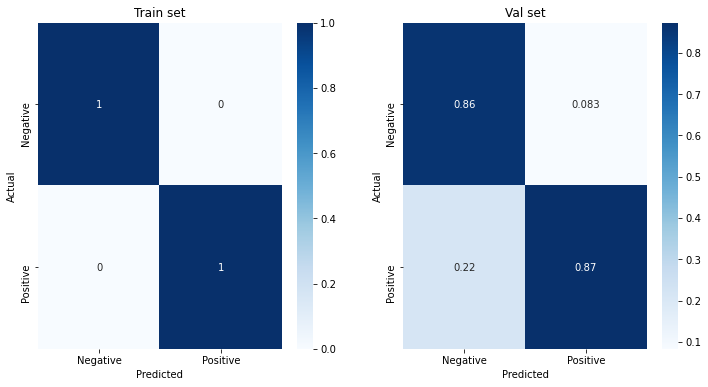

In [13]:
last_train_cm = res_ann["train"]["cm"][-1]
last_val_cm = res_ann["val"]["cm"][-1]
labs = ["Negative", "Positive"]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
sns.heatmap(last_train_cm / last_train_cm.sum(axis=1), ax=ax1, annot=True, yticklabels=labs, xticklabels=labs, cmap='Blues')
sns.heatmap(last_val_cm / last_val_cm.sum(axis=1), ax=ax2, annot=True, yticklabels=labs, xticklabels=labs, cmap='Blues')

ax1.set_title("Train set")
ax2.set_title("Val set")

ax1.set_ylabel("Actual")
ax2.set_ylabel("Actual")

ax1.set_xlabel("Predicted")
ax2.set_xlabel("Predicted")
plt.show()

In [18]:
logreg = load("..\models\lr_pipe.joblib")
logreg.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('logisticregression', LogisticRegression(C=48.32930238571752))],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'logisticregression': LogisticRegression(C=48.32930238571752),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 

In [19]:
svm = load("..\models\svm_pipe.joblib")
svm.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('svc', SVC(C=3.5938136638046276, gamma=0.21544346900318823))],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'svc': SVC(C=3.5938136638046276, gamma=0.21544346900318823),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 'tfi

In [20]:
nb = load("../models/naive_bayes_pipe.joblib")
nb.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('multinomialnb', MultinomialNB(alpha=0.05263157894736842))],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'multinomialnb': MultinomialNB(alpha=0.05263157894736842),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 'tfidfve

In [17]:
from sklearn.utils import check_random_state
check_random_state(32451365)
np.random.seed(32451365)